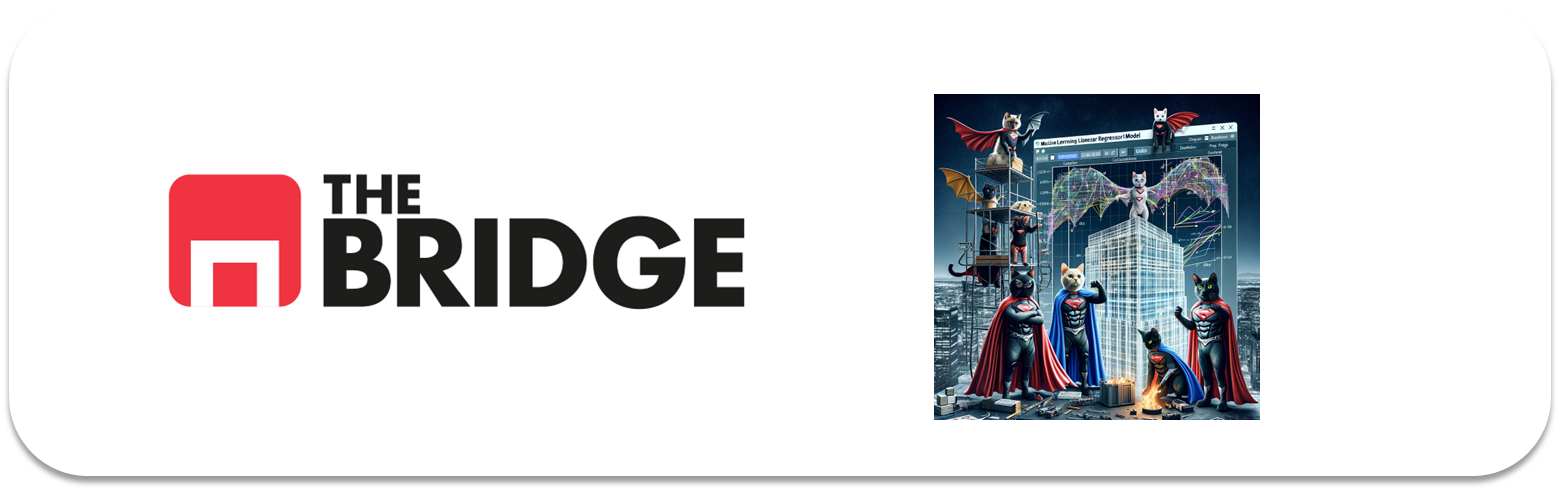

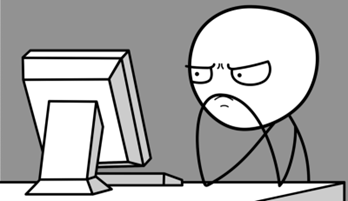

Para ejercitarte y afianzar lo aprendido sobre **Regresión Logistica aplicada a Multiclase**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios).

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay



En este conjunto de ejercicios crearás un modelo para resolver un problema multiclase o multicategórico de clasificación, en concreto de clasificación de flores en función de una serie de características de las mismas (otro de esos famosos datasets de aprendizajes, el "iris" dataset)

### Ejercicio 1: Carga de Datos

Cargar el conjunto de datos Iris, que se encuentra dentro del módulo de datasets de `sklearn` (load_iris en sklearn.datasets). Repasa el ejercicio sobre "Diabetes" de la unidad anterior para saber como construir un dataframe de características y una variable con el target.

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="target")


species = pd.Series(iris.target_names[iris.target], name="species")

In [ ]:
print("X shape:", X.shape)
print("y shape:", y.shape)
display(X.head())
display(y.head())
display(species.head())


X shape: (150, 4)
y shape: (150,)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

### Ejercicio 2



Muestra la info básica del dataset y sus primeras líneas. ¿Hay variables categóricas? Muestra el target y su distribución.

In [3]:
import pandas as pd
from sklearn.datasets import load_iris

# Cargar Iris
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="target")
species = pd.Series(iris.target_names[iris.target], name="species")  # opcional (nombres)

# Info básica
print("Shape X:", X.shape)
print("Shape y:", y.shape)
print("\nTipos de datos de X:")
print(X.dtypes)

print("\nInfo de X:")
X.info()

print("\nPrimeras filas de X:")
display(X.head())

print("\nPrimeras filas de y:")
display(y.head())

# ¿Hay variables categóricas en X?
cat_cols = X.select_dtypes(include="object").columns.tolist()
if cat_cols:
    print("\nVariables categóricas en X:", cat_cols)
else:
    print("\nNo hay variables categóricas en X (todas son numéricas).")

# Target y distribución
print("\nMapeo de clases (target → especie):")
for i, name in enumerate(iris.target_names):
    print(f"  {i} → {name}")

print("\nDistribución del target (conteo):")
print(y.value_counts().sort_index())

print("\nDistribución del target (proporción):")
print(y.value_counts(normalize=True).sort_index().round(4))

# (Opcional) ver distribución por nombre de especie
print("\nDistribución por especie (conteo):")
print(species.value_counts().reindex(iris.target_names))


Shape X: (150, 4)
Shape y: (150,)

Tipos de datos de X:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

Info de X:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB

Primeras filas de X:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2



Primeras filas de y:


0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


No hay variables categóricas en X (todas son numéricas).

Mapeo de clases (target → especie):
  0 → setosa
  1 → versicolor
  2 → virginica

Distribución del target (conteo):
target
0    50
1    50
2    50
Name: count, dtype: int64

Distribución del target (proporción):
target
0    0.3333
1    0.3333
2    0.3333
Name: proportion, dtype: float64

Distribución por especie (conteo):
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


*Claramente son posibles features numéricas. Mostramos el target y veamos cómo de equilibrado está*

In [ ]:
iris = load_iris()
y = pd.Series(iris.target, name="target")


counts = y.value_counts().sort_index()

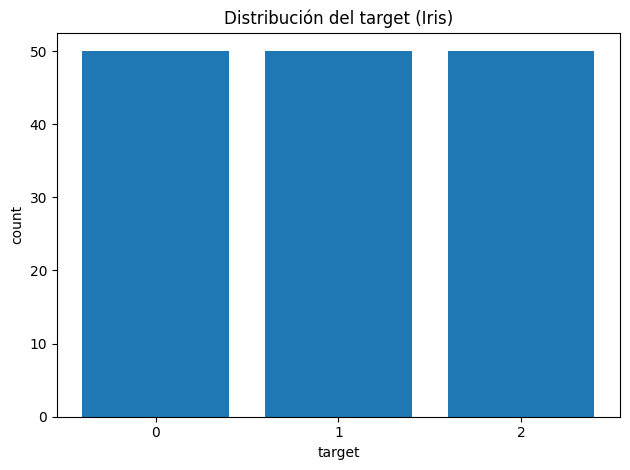

In [ ]:
plt.figure(figsize=(6.4, 4.8))  
plt.bar(counts.index.astype(str), counts.values)
plt.xlabel("target")
plt.ylabel("count")
plt.title("Distribución del target (Iris)")
plt.tight_layout()
plt.show()


*perfectamente balanceado, míralo con cariño que nos los verás así con mucha frecuencia*

### Ejercicio 3: Preparación de Datos

Divide el conjunto de datos en un 80% para entrenamiento y un 20% para pruebas (test). Crea el X_train, X_test, y_train e y_test. Normaliza las características para que tengan una media de 0 y una desviación estándar de 1. ?Qué tipo de escalado habrás hecho?


In [ ]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# normalizac
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns, index=X_train.index)
X_test_scaled  = pd.DataFrame(scaler.transform(X_test),  columns=X.columns, index=X_test.index)

In [ ]:
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled  shape:", X_test_scaled.shape)
print("y_train dist:\n", y_train.value_counts(normalize=True).sort_index())
print("y_test  dist:\n", y_test.value_counts(normalize=True).sort_index())


X_train_scaled shape: (120, 4)
X_test_scaled  shape: (30, 4)
y_train dist:
 target
0    0.333333
1    0.333333
2    0.333333
Name: proportion, dtype: float64
y_test  dist:
 target
0    0.333333
1    0.333333
2    0.333333
Name: proportion, dtype: float64


*Hagamos primero el split*

*Y ahora escalemos y comprobemos que se cumplen las condiciones de media 0 y desviación estándar 1, recuerda que esto es lo que se llama estandardizar o estandarizar. Lo vamos a ver también en el test pero para que observes el efecto de aplizar el estandarizador ajustado al train y no al test*

In [ ]:
# Normalización de las características, observa como el scaler se "ajusta" al train y se aplica así al test. 




In [ ]:
scaler = StandardScaler()

# Ajuste SOLO en train, y transformación en train y test
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns, index=X_test.index)


In [ ]:
print(X_train_scaled.mean().round(6))
print("\nTRAIN std (≈1, ddof=0):")
print(X_train_scaled.std(ddof=0).round(6))

print("\nTEST means (no exactamente 0):")
print(X_test_scaled.mean().round(6))
print("\nTEST std (no exactamente 1, ddof=0):")
print(X_test_scaled.std(ddof=0).round(6))


TRAIN means (≈0):
sepal length (cm)   -0.0
sepal width (cm)    -0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

TRAIN std (≈1, ddof=0):
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64

TEST means (no exactamente 0):
sepal length (cm)    0.009951
sepal width (cm)     0.100750
petal length (cm)   -0.034069
petal width (cm)    -0.037306
dtype: float64

TEST std (no exactamente 1, ddof=0):
sepal length (cm)    0.925371
sepal width (cm)     0.849466
petal length (cm)    0.994607
petal width (cm)     1.000850
dtype: float64


In [7]:
# Suponiendo que ya tienes X_train_scaled (StandardScaler ajustado en train)
desc = X_train_scaled.describe()
display(desc)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02
mean,-1.184238e-15,-1.998401e-15,4.958996e-16,1.669035e-15
std,1.004193e+00,1.004193e+00,1.004193e+00,1.004193e+00
min,-1.840983e+00,-2.347097e+00,-1.516067e+00,-1.454945e+00
25%,-8.856620e-01,-5.559895e-01,-1.232159e+00,-1.191606e+00
50%,-1.094638e-01,-1.082127e-01,2.725514e-01,1.250858e-01
75%,6.667343e-01,6.194245e-01,7.551944e-01,7.834318e-01
max,2.457961e+00,3.026225e+00,1.777262e+00,1.705116e+00


*Fíjate en las medias (mean) cercanas a 0 y en la desviación (std) muy ajustadas a 1*


In [8]:
# Resumen del TEST ya estandarizado
desc_test = X_test_scaled.describe()
display(desc_test)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,30.000000,30.000000,30.000000,30.000000
mean,0.009951,0.100750,-0.034069,-0.037306
std,0.941190,0.863987,1.011610,1.017959
min,-1.721568,-1.675431,-1.572848,-1.323276
25%,-0.706539,-0.276129,-1.260550,-1.323276
50%,0.248781,-0.108213,0.414505,0.256755
75%,0.786149,0.563452,0.740999,0.783432
max,1.741470,2.130671,1.436573,1.573447


*En cambio en el test, las medias son las que son y la std, no es necesariamente 1 en todas. Es normal, hemos usado los valores de media y desviación estándar originales del dataset de train... Como debe ser, recuerda que el test son siempre datos que simulan los datos nuevos que pueden venirnos en el futuro, por lo tanto no podemos tenerlo para el entrenamiento y no podemos usarlos para escalar*

### Ejercicio 4: Entrenamiento del Modelo de Regresión Logística

Ahora que los datos están listos, es el momento de construir y entrenar tu modelo de regresión logística. Inicializa y entrenar un modelo de regresión logística utilizando el conjunto de entrenamiento (con tan pocos datos no es necesario que ajustes el hiperparámetro "max_iter")


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1) Instanciar el modelo (sin tocar max_iter)
log_clf = LogisticRegression()

# 2) Entrenar con el conjunto de entrenamiento escalado
log_clf.fit(X_train_scaled, y_train)

# 3) Métrica rápida
y_pred_tr = log_clf.predict(X_train_scaled)
y_pred_te = log_clf.predict(X_test_scaled)

print("Accuracy (train):", accuracy_score(y_train, y_pred_tr))
print("Accuracy (test) :", accuracy_score(y_test,  y_pred_te))


Accuracy (train): 0.9583333333333334
Accuracy (test) : 0.9333333333333333


In [ ]:
log_pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),     
    ("clf", LogisticRegression())])

log_pipe.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#####
y_pred_tr = log_pipe.predict(X_train)
y_pred_te = log_pipe.predict(X_test)

print("Accuracy (train):", accuracy_score(y_train, y_pred_tr))
print("Accuracy (test) :", accuracy_score(y_test,  y_pred_te))

### Ejercicio 5: Evaluación del train

Obtén las predicciones para el dataset de train y luego calcula y muestra la matriz de confusión y genera y muestra un informe de clasificación.

*Primero las predicciones de train*

In [ ]:
y_pred_tr = log_clf.predict(X_train_scaled)

In [ ]:
cm = confusion_matrix(y_train, y_pred_tr)
cm_norm = confusion_matrix(y_train, y_pred_tr, normalize='true')

target_names = list(load_iris().target_names)

print("TRAIN")
print(classification_report(y_train, y_pred_tr, target_names=target_names))

=== Classification report (TRAIN) ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.93      0.95      0.94        40
   virginica       0.95      0.93      0.94        40

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



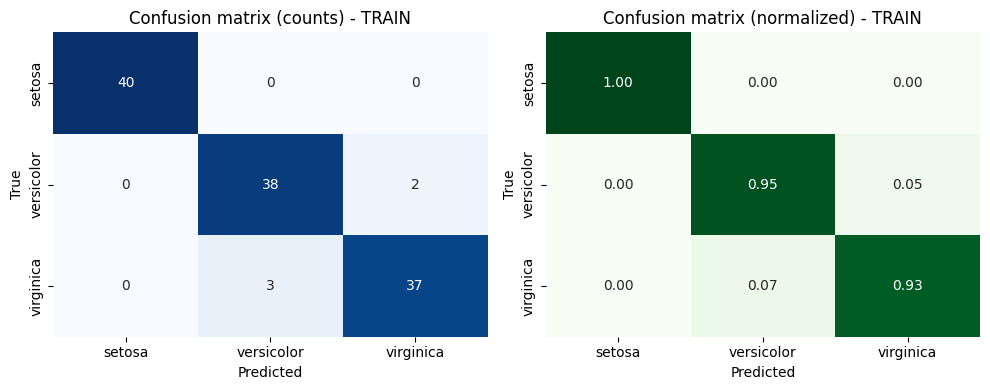

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=target_names, yticklabels=target_names, ax=axes[0])
axes[0].set_title("Confusion matrix (counts) - TRAIN")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")

sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Greens', cbar=False,
            xticklabels=target_names, yticklabels=target_names, ax=axes[1])
axes[1].set_title("Confusion matrix (normalized) - TRAIN")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("True")

plt.tight_layout()
plt.show()


EN EL TRAIN NO PODEMOS SABER SI LOS DATOS ESTAN SOBREFITEADOS

LA PREDICION DEBE ESTAR ESTANDARIZADA SINO NO LA DARA BIEN

CUANDO HACES UN Fit_transform de mas tendras seguramente OVERFITTING

*Y ahora las métricas y la matriz de confusión*

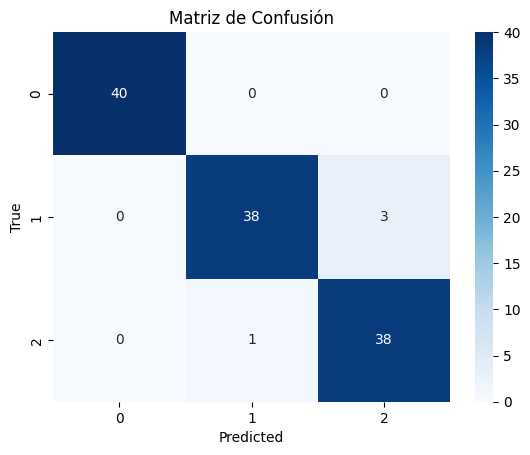

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.93      0.95        41
           2       0.93      0.97      0.95        39

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



In [ ]:
# Calculamos la matriz de confusión


# Visualizar la matriz de confusión


# Generar el informe de clasificación



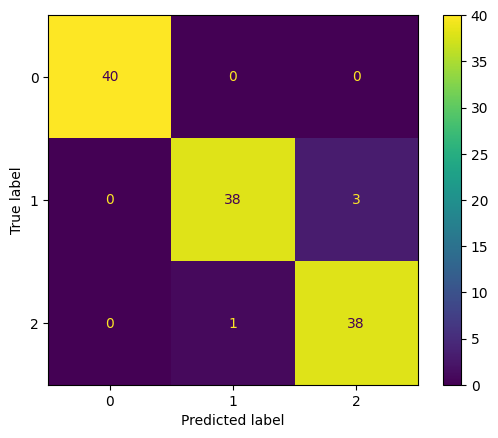

### Ejercicio 6: Evaluación del test

Obtén las predicciones para el dataset de test y luego calcula y muestra la matriz de confusión y genera y muestra un informe de clasificación.

In [ ]:
y_pred_te = log_clf.predict(X_test_scaled)

In [ ]:
print("Accuracy (TEST):", accuracy_score(y_test, y_pred_te))

In [ ]:
#M CONFUCION
cm_te = confusion_matrix(y_test, y_pred_te)
cm_te_norm = confusion_matrix(y_test, y_pred_te, normalize='true')

target_names = list(load_iris().target_names)

print("\n=== Classification report (TEST) ===")
print(classification_report(y_test, y_pred_te, target_names=target_names))

Accuracy (TEST): 0.9333333333333333

=== Classification report (TEST) ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



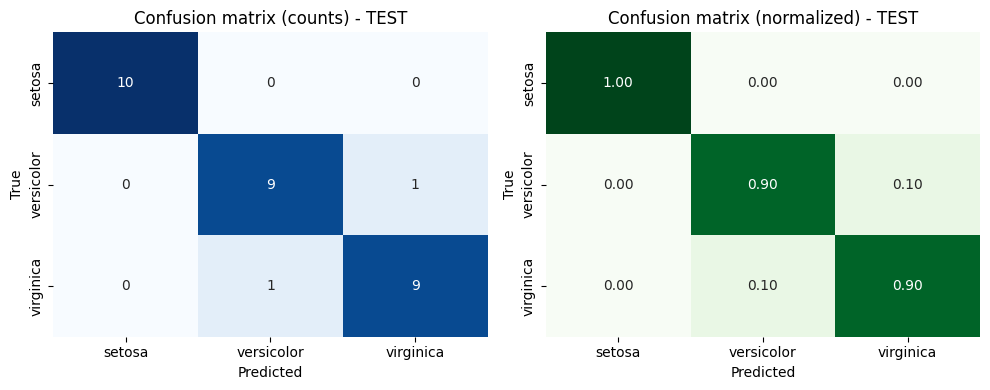

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.heatmap(cm_te, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=target_names, yticklabels=target_names, ax=axes[0])
axes[0].set_title("Confusion matrix (counts) - TEST")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")

sns.heatmap(cm_te_norm, annot=True, fmt='.2f', cmap='Greens', cbar=False,
            xticklabels=target_names, yticklabels=target_names, ax=axes[1])
axes[1].set_title("Confusion matrix (normalized) - TEST")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("True")

plt.tight_layout()
plt.show()


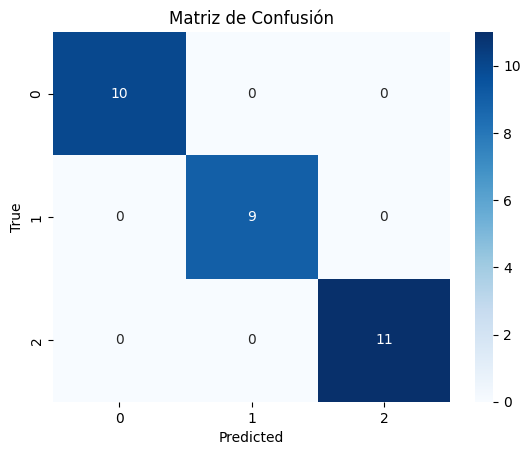

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
# Calculamos la matriz de confusión


# Visualizar la matriz de confusión


# Generar el informe de clasificación



### Ejercicio 7: Interpretación de los coeficientes del modelo

Muestra los coeficientes para cada clasificador numéricamente


In [ ]:
iris = load_iris()
class_names = iris.target_names
feat_names = X_train_scaled.columns 

In [ ]:
coefs = pd.DataFrame(log_clf.coef_, columns=feat_names, index=class_names)
inter = pd.Series(log_clf.intercept_, index=class_names, name="intercept")

print("Coeficientes")
display(coefs)

print("Interceptos")
display(inter)

=== Coeficientes (por clase y feature) ===


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
setosa,-1.088945,1.024208,-1.799056,-1.686228
versicolor,0.536337,-0.360487,-0.204074,-0.807957
virginica,0.552608,-0.663721,2.003130,2.494185


=== Interceptos ===


setosa       -0.305587
versicolor    1.908556
virginica    -1.602969
Name: intercept, dtype: float64

=== Coefs ordenados por |coef| dentro de cada clase (opcional) ===


,clase,feature,coef,abs_coef
2,setosa,petal length (cm),-1.799056,1.799056
3,setosa,petal width (cm),-1.686228,1.686228
0,setosa,sepal length (cm),-1.088945,1.088945
1,setosa,sepal width (cm),1.024208,1.024208
7,versicolor,petal width (cm),-0.807957,0.807957
4,versicolor,sepal length (cm),0.536337,0.536337
5,versicolor,sepal width (cm),-0.360487,0.360487
6,versicolor,petal length (cm),-0.204074,0.204074
11,virginica,petal width (cm),2.494185,2.494185
10,virginica,petal length (cm),2.003130,2.003130


In [ ]:
coefs = log_clf.coef_

np.set_printoptions(precision=8, suppress=False)
print(coefs)


[[-1.08894494  1.02420763 -1.79905609 -1.68622819]
 [ 0.53633654 -0.36048698 -0.20407418 -0.80795703]
 [ 0.5526084  -0.66372065  2.00313027  2.49418523]]


*Son tres arrays porque recuerda que si no le decimos nada LogisticRegression emplea una estrategia one-vs-all o one-vs-rest para acometer los problemas de multiclasificación*

### Ejercicio 8: Interpretación de los coeficientes del modelo (II)

Modifica la siguiente función y pinta los coeficientes obtenidos en el ejercicio anterior:

```python
def show_coefs(model, figsize=(10, 5)):
    df_coef = pd.DataFrame(model.coef_[0], index=model.feature_names_in_, columns=["coefs"])

    fig, ax = plt.subplots(1, 2, figsize=figsize)
    df_coef.plot(kind="barh", ax=ax[0], legend=False)
    df_coef.abs().sort_values(by="coefs").plot(kind="barh", ax=ax[1], legend=False)
    fig.suptitle("Model Coefficients")

    fig.tight_layout()

    return df_coef
```

*Hay que pedirle que pinte las gráficas para cada uno de los modelos, lo podemos hacer dentro o fuera de la función...*

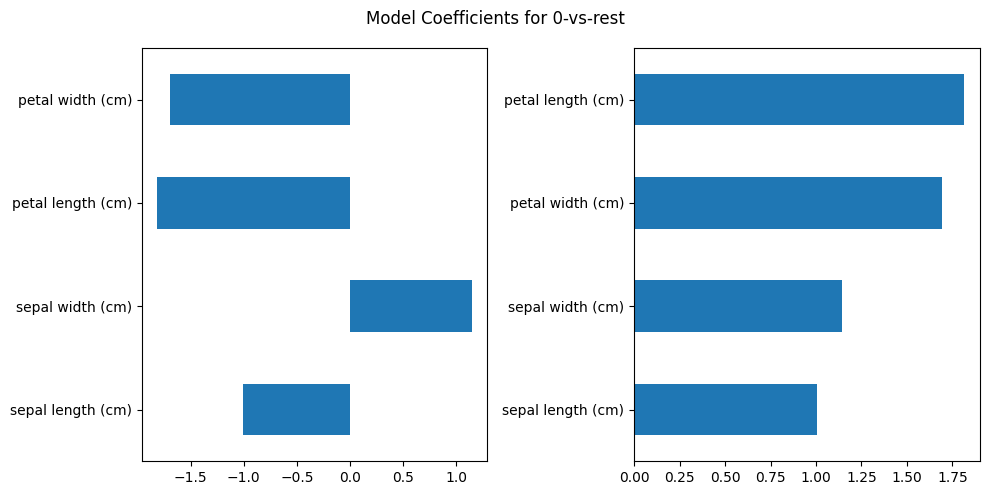

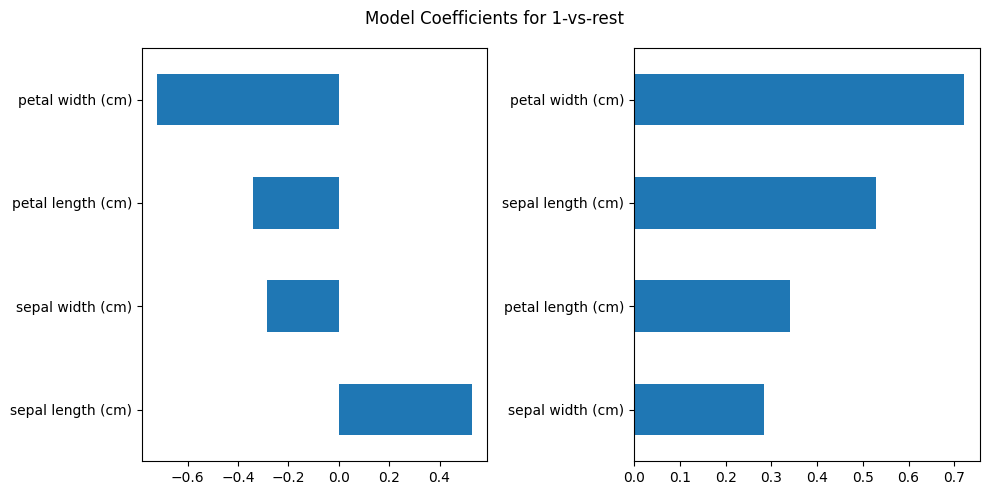

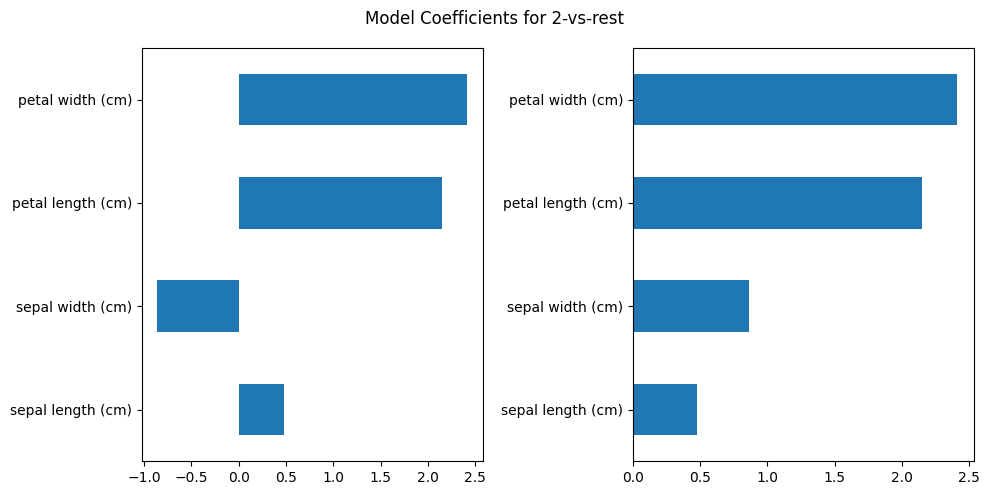

In [17]:
# Por fuera
# Las gráficas de la derecha son los mismos coeficientes en valor absoluto

def show_coefs(model, figsize=(10, 5), model_index = 0): # Metemos el índice para indicar que modelo pintar
    df_coef = pd.DataFrame(model.coef_[model_index], index=model.feature_names_in_, columns=["coefs"]) # El indice dice que juego de coeficientes considerar

    fig, ax = plt.subplots(1, 2, figsize=figsize)
    df_coef.plot(kind="barh", ax=ax[0], legend=False)
    df_coef.abs().sort_values(by="coefs").plot(kind="barh", ax=ax[1], legend=False)
    fig.suptitle(f"Model Coefficients for {model_index}-vs-rest") # Cambiamos la leyenda para ver qué modelo está presentando

    fig.tight_layout()

    return df_coef

for model_index in range(3): # Para cada modelo aplicamos la función
    show_coefs(model, model_index = model_index)

*Ahora haciendo que se encargue la función de todo*

[                      coefs
 sepal length (cm) -1.003166
 sepal width (cm)   1.144873
 petal length (cm) -1.811348
 petal width (cm)  -1.692510,
                       coefs
 sepal length (cm)  0.527990
 sepal width (cm)  -0.283200
 petal length (cm) -0.340607
 petal width (cm)  -0.720140,
                       coefs
 sepal length (cm)  0.475175
 sepal width (cm)  -0.861673
 petal length (cm)  2.151955
 petal width (cm)   2.412650]

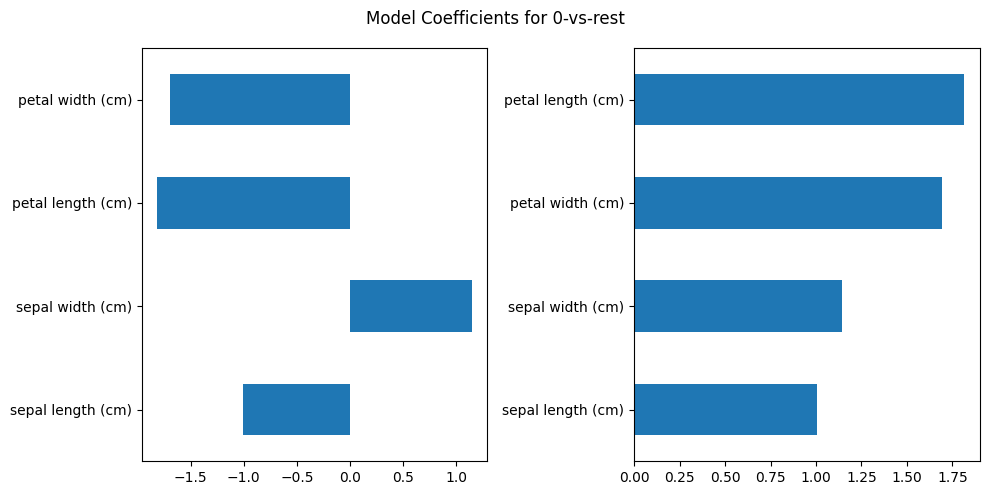

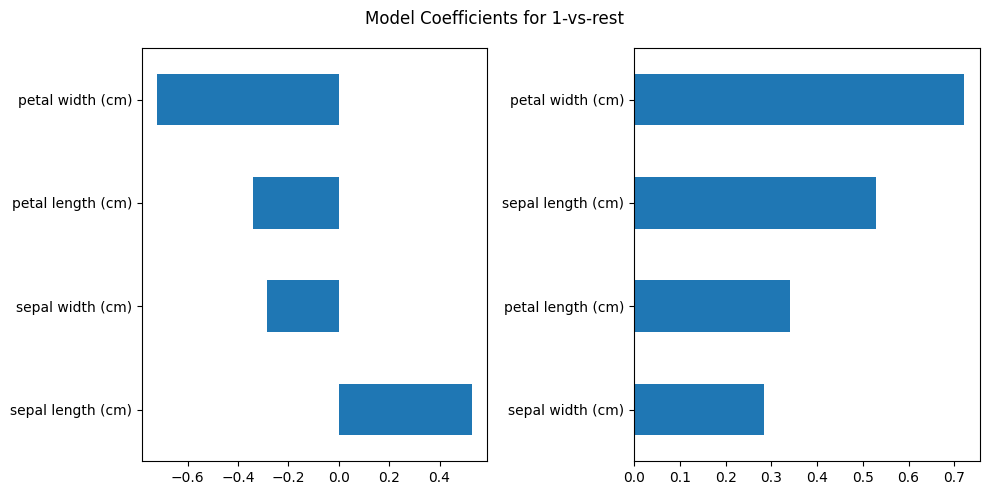

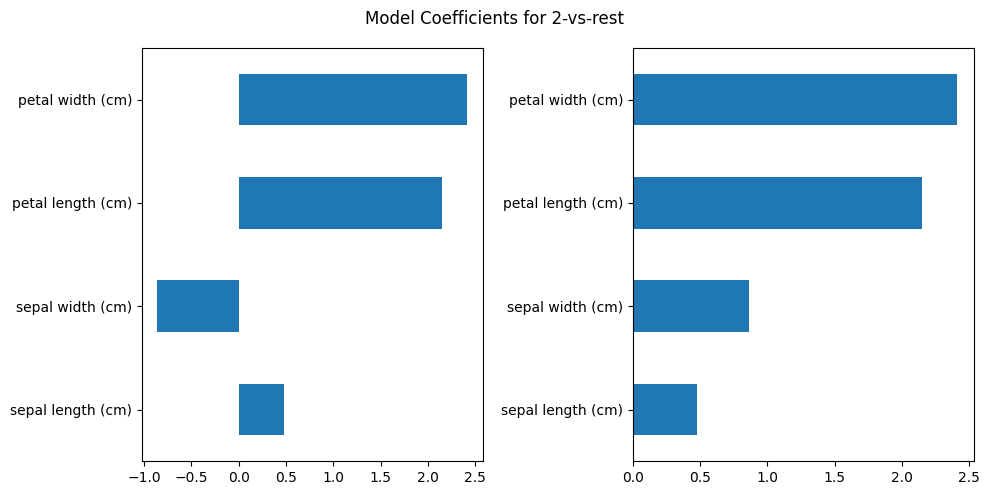

In [18]:
def show_coefs(model, figsize=(10, 5)): 
    number_of_submodels = model.coef_.shape[0] # Obtenemos el número de submodelos, ya que coef_ devuelve un array de dimensión 2 (ndim de numpy ojo) y la cardinalidad de la primera da el numero de modelos o sea el número de clases
    # number_of_submodels = len(model.classes_), sería una opción alternativa.
    list_of_dfs = []
    for model_index in range(number_of_submodels):
        df_coef = pd.DataFrame(model.coef_[model_index], index=model.feature_names_in_, columns=["coefs"]) # El indice dice que juego de coeficientes considerar

        fig, ax = plt.subplots(1, 2, figsize=figsize)
        df_coef.plot(kind="barh", ax=ax[0], legend=False)
        df_coef.abs().sort_values(by="coefs").plot(kind="barh", ax=ax[1], legend=False)
        fig.suptitle(f"Model Coefficients for {model_index}-vs-rest") # Cambiamos la leyenda para ver qué modelo está presentando

        fig.tight_layout()
        list_of_dfs.append(df_coef.copy())

    return list_of_dfs

show_coefs(model)